# Distributed

In [104]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap
import colorsys

mpl.rcParams['font.family'] = 'Helvetica'  # 'Helvetica'  sans-serif
mpl.rcParams["xtick.direction"] = 'out' # 'out'
mpl.rcParams["ytick.direction"] = 'out'
mpl.rcParams['legend.frameon'] = True
# plt.rcParams['lines.markeredgecolor'] = 'k'
mpl.rcParams['errorbar.capsize'] = 4
mpl.rcParams['lines.solid_capstyle'] = 'round'
mpl.rcParams['lines.dash_capstyle'] = 'round'
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.transparent'] = True

SMALL_SIZE, MEDIUM_SIZE, LARGE_SIZE = 11, 18, 24
WIDTH = 1.5

def set_fontsize(small=SMALL_SIZE, medium=MEDIUM_SIZE, large=LARGE_SIZE, linewidth=WIDTH):
    plt.rc('font', size=medium)  # controls default text sizes
    plt.rc('axes', titlesize=large)  # fontsize of the axes title
    plt.rc('axes', labelsize=large)  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=large)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=large)  # fontsize of the tick labels
    plt.rc('legend', fontsize=medium)  # legend fontsize
    plt.rc('figure', titlesize=large)  # fontsize of the figure title
    mpl.rcParams['lines.markersize'] = small

    mpl.rcParams['axes.linewidth'] = linewidth
    mpl.rcParams['xtick.major.size'] = linewidth+3
    mpl.rcParams['xtick.minor.size'] = linewidth+1
    mpl.rcParams['ytick.major.size'] = linewidth+3
    mpl.rcParams['ytick.minor.size'] = linewidth+1
    mpl.rcParams['xtick.major.width'] = linewidth
    mpl.rcParams['xtick.minor.width'] = linewidth
    mpl.rcParams['ytick.major.width'] = linewidth
    mpl.rcParams['ytick.minor.width'] = linewidth
    mpl.rcParams['lines.linewidth'] = linewidth+0.5
    mpl.rcParams['lines.markeredgewidth'] = linewidth+0.5

set_fontsize()

color_cycle = ['#c57979ff', '#768dbcff', '#8ab98dff', '#b98d8aff']
# color_cycle = ["#B65655FF", "#5471abFF", "#6aa66eFF", "#A66E6AFF"]
colors = mpl.cycler(color=color_cycle, markeredgecolor=['k']*len(color_cycle)) 
mpl.rc('axes', prop_cycle=colors)

In [103]:
from quantum_simulation_recipe.plot_config import *
# lighten_color(color_cycle, amount=0.3)
[lighten_color(color, 0.1) for color in ["#B65655FF", "#5471abFF", "#6aa66eFF", "#A66E6AFF"]]

['#c57979ff', '#768dbcff', '#8ab98dff', '#b98d8aff']

In [26]:
fig_dir, data_dir = "./figs", "./data"
prefix, suffix = "distributed", "klocal"

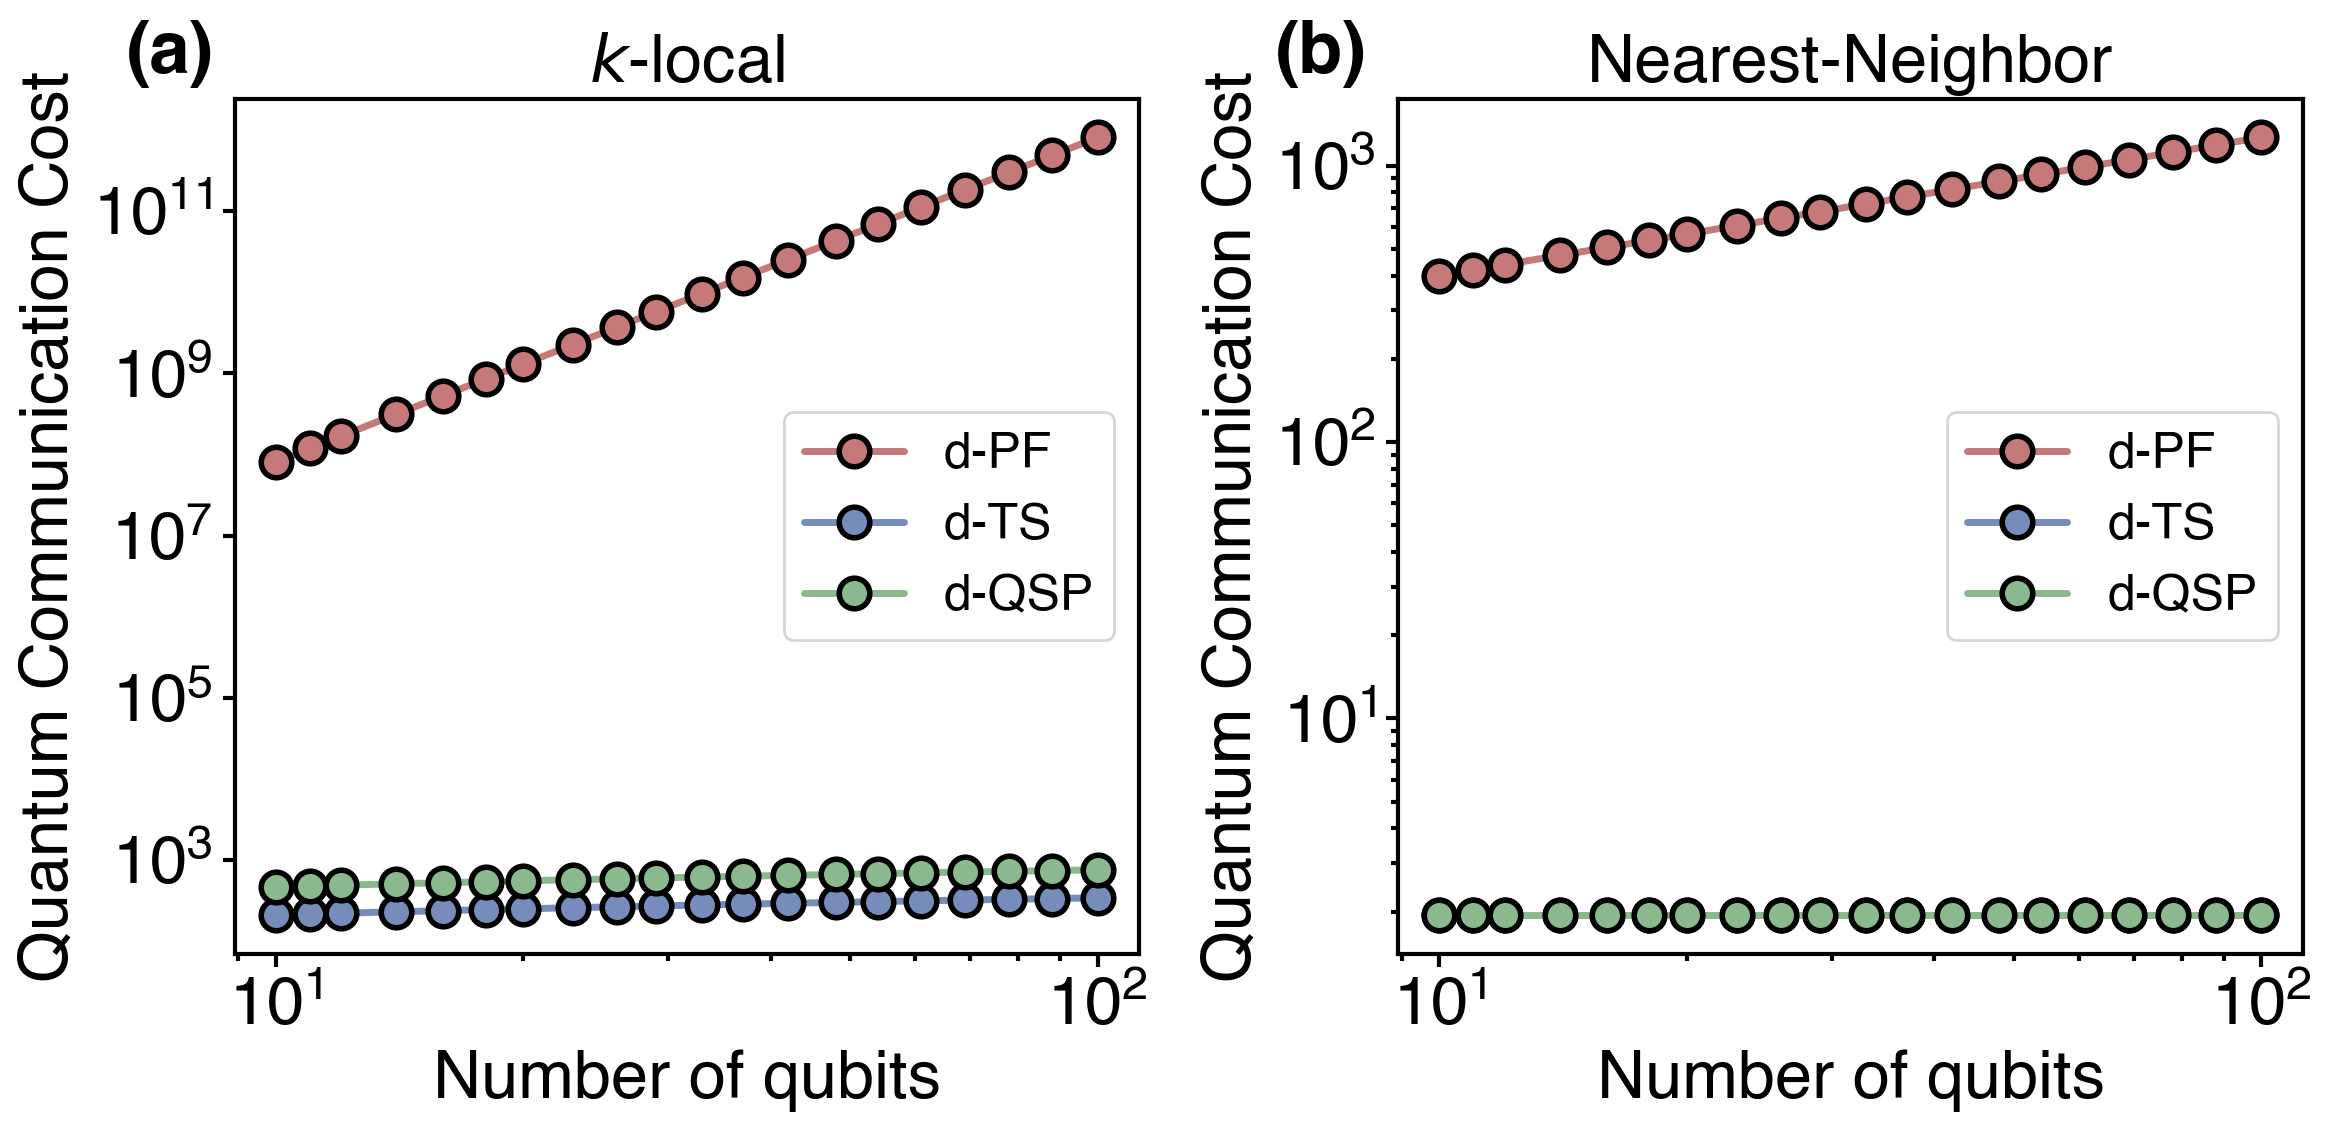

In [106]:
from numpy import log

def pf_qcc(model, t, p, eps, Gamma, n, alpha, k):
    s = t**(1+1/p)/eps**(1/p)
    if model == 'klocal':
        result = (Gamma*n)**k * alpha**(1/p) * s 
    elif model == 'nn':
        result = Gamma * n**(1/p) * s
    else: 
        raise ValueError(f"Model {model} not recognized")

    return result

def lcu_qcc(model, t, eps, Gamma, n, alpha, k):
    s = log(alpha*t/eps)/log(log(alpha*t/eps))
    if model == 'klocal':
        result = min(k, Gamma) * k * log(Gamma*n) * alpha * s 
    elif model == 'nn':
        result = log(2*Gamma - 1) * alpha
    else: 
        raise ValueError(f"Model {model} not recognized")

    return result

def qsp_qcc(model, t, eps, Gamma, n, alpha, k):
    s = alpha*t + log(1/eps)
    if model == 'klocal':
        result = min(k, Gamma) * k * log(Gamma*n) * alpha * s 
    elif model == 'nn':
        result = log(2*Gamma - 1) * alpha
    else: 
        raise ValueError(f"Model {model} not recognized")

    return result

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mpl.rcParams['lines.linewidth'] = 2.5

Gamma, alpha, k, eps, t = 4, 1, 4, 1e-3, 1
n_list = np.logspace(1, 2, 20, dtype=int)

axes[0].plot(n_list, [pf_qcc('klocal', t, 2, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-PF')
axes[0].plot(n_list, [lcu_qcc('klocal', t, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-TS')
axes[0].plot(n_list, [qsp_qcc('klocal', t, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-QSP')
axes[0].set_yscale('log'); axes[0].set_xscale('log')
axes[0].set_xlabel('Number of qubits'); axes[0].set_ylabel('Quantum Communication Cost')

axes[1].plot(n_list, [pf_qcc('nn', t, 2, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-PF')
axes[1].plot(n_list, [lcu_qcc('nn', t, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-TS')
axes[1].plot(n_list, [qsp_qcc('nn', t, eps, Gamma, n, alpha, k) for n in n_list], '-o', label='d-QSP')
axes[1].set_yscale('log'); axes[1].set_xscale('log')
axes[1].set_xlabel('Number of qubits'); axes[1].set_ylabel('Quantum Communication Cost')
axes[0].legend(); axes[1].legend()
axes[0].set_title(r'$k$-local'); axes[1].set_title('Nearest-Neighbor')
axes[0].text(-.12, 1.03, f'(a)', transform=axes[0].transAxes, size=26, weight='bold')
axes[1].text(1.15, 1.03, f'(b)', transform=axes[0].transAxes, size=26, weight='bold')
fig.savefig(f'{fig_dir}/{prefix}_{suffix}.pdf')